<a href="https://colab.research.google.com/github/DocMX/Analisis_Inteligente_De_Datos/blob/main/Caso_3_Regresi%C3%B3n_Lineal_M%C3%BAltiple_Advertising_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Caso 3. Regresión Lineal Múltiple con datos Adverstising. Programación Python"

author: "Jorge Luis Vega Hernández"

date: "2022-09-28"

# Objetivo

Crear y evaluar un modelo de regresión lineal múltiple para predecir las ventas con datos simulados de una empresa dependiendo de las inversiones realizadas en publicidad

# Descripción

-   Cargar librerías y datos

-   Limpiar datos si es necesario

-   Explorar datos

-   Partir los datos en datos de entrenamiento y datos de validación 70% y 30%

-   Crear modelo de regresión con los datos de entrenamiento

-   Evaluar modelo antes de predicciones con los estadísticos. R Square ajustado y Coeficientes

-   El modelo se acepta si presenta un valor de R Square ajustado por encima del 70%

-   Predicciones

-   Evaluar predicciones con respecto a datos reales

-   Determinar el estadístico *rmse* para evaluar con respecto a otros modelos

-   Interpretar el caso

# Fundamento teórico

En la mayoría de los problemas de investigación en los que se aplica el análisis de regresión se necesita más de una variable independiente para el modelo de regresión.

La complejidad de la mayoría de mecanismos científicos es tal que, con el fin de predecir una respuesta importante, se requiere un modelo de regresión múltiple. Cuando un modelo es lineal en los coeficientes se denomina modelo de regresión lineal múltiple.

Para el caso de k variables independientes, el modelo que da $x_1,x_2,x_3...,x_k$, y $y$ como la variable dependiente.

$x_1, x_2, x_3,...,x_k$ son las variable s que afectan a la variable dependiente en el modelo de regresión lineal múltiple.

Muchos problemas de investigación y de la industria, requieren la estimación de las relaciones existentes entre el patrón de variabilidad de una variable aleatoria y los valores de una o más variables aleatorias. [@urrutiamosquera2011]

Al generar un modelo de regresión lineal múltiple es importante identificar los estadísticos de R2, que se denomina coeficiente de determinación y es una medida de la proporción de la variabilidad explicada por el modelo ajustado.

De igual forma, el valor de R2 ajustado (*R Square Adjusted*) o coeficiente de determinación ajustado, es una variación de R2 que proporciona un ajuste para los grados de libertad [@walpole2012].

El estadístico R Ajustado está diseñado para proporcionar un estadístico que castigue un modelo sobreajustado, de manera que se puede esperar que favorezca al modelo [@walpole2012].

Una variable **Y** puede predecirse conforme y de acuerdo con la siguiente fórmula de la regresión múltiple.

$$
Y = b_0 + b_1{x_1} + b_2{x_2} + b_3{x_3}+ .....b_k{x_k}
$$

# Desarrollo

Para trabajar con código Python, se deben cargan las librerías de *Python* previamente instaladas con la función *py_install()* de la librería *reticulate* de R.

La función *repl_python()* se utilizar para ejecutar ventana de comando o *shell* de *Python.*

Se recomienda instalar estos paquetes de *Python*

-   *py_install(packages = "pandas")*

-   *py_install(packages = "matplotlib")*

-   *py_install(packages = "numpy")*

-   *py_install(packages = "sklearn") en R cloud*

-   *py_install("scikit-learn") R Studio local*

-   *py_install(packages = "statsmodels.api")*

-   *py_install(packages = "seaborn")*

-   En terminal de Python se puede actualizar con c*onda create -n py3.8 python=3.8 scikit-learn pandas numpy matplotlib*

## Cargar librerías

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Cargar datos

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


## Explorar datos

In [3]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (200, 7)
Columnas y tipo de dato


Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object

Se describen las variables independientes: TV, Radio Newpaper y la variable dependiente Sales.

Valor de etiqueta o variable objetivo deendiente(ventas): que significa el volumen de ventas del producto correspondiente

Las variables independientes: (TV, Radio, Periódico, WEB):

TV: para un solo producto en un mercado determinado, el costo de la publicidad en TV (en miles) Radio: costos de publicidad invertidos en medios de difusión Periódico: costos publicitarios para medios periodísticos.

In [4]:
datos[['TV','Radio', 'Newspaper', 'Web', 'Sales', ]].describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


### Dispersión de la variables con respecto a Sales.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


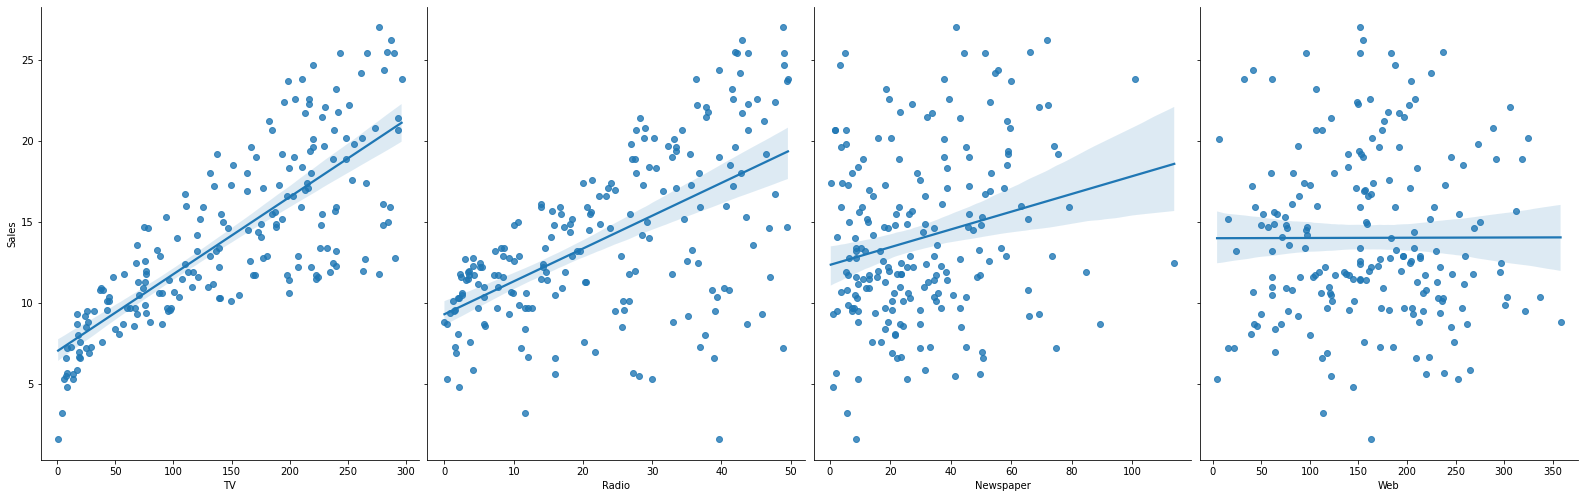

In [5]:
sns.pairplot(datos, x_vars=['TV','Radio','Newspaper', 'Web'], y_vars='Sales', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

Se observa la relación lineal entre las variables independientes con respecto a ventas, de tal forma que es posible estimar visualmente que la variable Newspaper tal vez tenga poco impacto en las ventas esto por la alta dispersión de los datos. Sin embargo participará en el modelo de regresión lineal múltiple.

Se observa también que la variable *Web* tiene poca correlación lineal con la variable *Sales*

### Identificar variables independientes y dependiente

Quitar las primeras columnas y dejar TV Radio NewsPaper Web y Sales

In [6]:
print("Variables independientes ")
X_independientes = datos.iloc[:,2:6]
X_independientes

Variables independientes 


,TV,Radio,Newspaper,Web
0,230.1,37.8,69.2,306.634752
1,44.5,39.3,45.1,302.653070
2,17.2,45.9,69.3,49.498908
3,151.5,41.3,58.5,257.816893
4,180.8,10.8,58.4,195.660076
...,...,...,...,...
195,38.2,3.7,13.8,248.841073
196,94.2,4.9,8.1,118.041856
197,177.0,9.3,6.4,213.274671
198,283.6,42.0,66.2,237.498063


In [7]:
print ("Variable dependiente")
Y_dependiente = datos.iloc[:, 6:7]
Y_dependiente

Variable dependiente


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


## Datos de entrenamiento y datos de validación

Se utiliza semilla 1747(*random_state=1747*)

In [8]:
X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=1747)

### Datos de entrenamiento

In [9]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']])

Estructura de datos de entrenamiento...  (140, 4)
        TV  Radio  Newspaper         Web
52   216.4   41.7       39.6  161.802512
159  131.7   18.4       34.6  196.370304
15   195.4   47.7       52.9  148.095134
5      8.7   48.9       75.0   22.072395
175  276.9   48.9       41.8  151.990733
..     ...    ...        ...         ...
158   11.7   36.9       45.2  185.866079
24    62.3   12.6       18.3  256.965240
143  104.6    5.7       34.4  336.571095
33   265.6   20.0        0.3   94.207255
67   139.3   14.5       10.2  207.661990

[140 rows x 4 columns]
        TV
52   216.4
159  131.7
15   195.4
5      8.7
175  276.9
..     ...
158   11.7
24    62.3
143  104.6
33   265.6
67   139.3

[140 rows x 1 columns]      Radio
52    41.7
159   18.4
15    47.7
5     48.9
175   48.9
..     ...
158   36.9
24    12.6
143    5.7
33    20.0
67    14.5

[140 rows x 1 columns]      Newspaper
52        39.6
159       34.6
15        52.9
5         75.0
175       41.8
..         ...
158       45.2
24

## Modelo de Regresión lineal múltiple

Se construye el modelo de regresión lineal mútiple

In [10]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

### Evaluación del modelo antes de predicciones

Se presentan los coeficientes, la intersección $\beta_0$ y los coeficientes para cada variable independiente, $\beta_1, \beta_2,\beta_3, \text{ y } \beta_4$

In [11]:
print ("Intercepción o b0") 
b0 = modelo_rm.intercept_
print (b0)
print ("Coeficientes: b1, b2, b3 y b4") 
# print (modelo_rm.coef_)
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
b4 = modelo_rm.coef_[0, 3:4]
print (b1, b2, b3, b4)

Intercepción o b0
[2.31361065]
Coeficientes: b1, b2, b3 y b4
[0.04654742] [0.18302642] [-0.00050635] [0.00434896]


$$
Prediccion:\text { Y} = b_0 + b_1\cdot {x_1} + b_2\cdot{x_2} + b_3\cdot{x_3}+b_3\cdot{x_4}
$$

$$
\text{Prediccion Sales} :\text { Y} = b_0 + b_1\cdot {TV} + b_2\cdot{Radio} + b_3\cdot{Newspaper}+b_3\cdot{Web}
$$

### R Square y R Square ajustado a a partir del modelo

Sobrepasa el 80% de tal forma que el el modelo **SE ACEPTA** por este criterio.

In [12]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.8974853899748444


## Predicciones

Se hacen predicciones con los datos de validación

In [13]:
predicciones = modelo_rm.predict(X_valida)
print(predicciones[:-1])
print(predicciones.shape)

[[ 8.30313928]
 [ 9.59518527]
 [12.4157793 ]
 [10.58062669]
 [16.22753094]
 [13.38327877]
 [10.19585773]
 [13.17893148]
 [16.39235128]
 [12.62797799]
 [17.78312561]
 [21.21646544]
 [20.16408787]
 [ 8.92196753]
 [19.65955732]
 [ 4.38529696]
 [12.18492808]
 [12.7571027 ]
 [17.51489658]
 [ 6.62472709]
 [17.41540544]
 [ 9.23262438]
 [14.05744318]
 [14.62109575]
 [14.54266865]
 [17.52683886]
 [21.29241557]
 [20.10569415]
 [12.56283732]
 [22.34983733]
 [18.17058205]
 [21.24107293]
 [16.08307724]
 [13.96503229]
 [18.25724551]
 [11.77942829]
 [10.16526665]
 [10.68177222]
 [14.19019678]
 [14.83936296]
 [ 3.72670265]
 [16.19945688]
 [15.61332585]
 [ 9.2226156 ]
 [20.22880276]
 [18.11977309]
 [18.66072902]
 [17.41054301]
 [12.102045  ]
 [18.88108114]
 [24.20551506]
 [21.00799452]
 [15.34788976]
 [23.24080765]
 [12.3940616 ]
 [10.97441962]
 [16.24280289]
 [10.19287945]
 [17.6332805 ]]
(60, 1)


## Evaluar predicciones

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Se usa el *type()* para conocer el tipo de estructura de datos

Se usa el *assign()* para agregar columnas al df comparaciones

Se usa *flatten().tolist()* para convertir a una lista de una dimensión.

Al final se tiene un d*ata.frame* llamado comparaciones en donde las últimas columnas tienen los valores reales de 'Sales' y las predicciones en la variable 'Predicho'.

In [14]:
print(type(X_valida))
# print(X_valida)
print(type(predicciones))
# print(predicciones)
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
        TV  Radio  Newspaper         Web  Sales_Real   Predicho
56     7.3   28.1       41.4  121.328525         5.5   8.303139
140   73.4   17.0       12.9  174.772137        10.9   9.595185
116  139.2   14.3       25.6  234.183118        12.2  12.415779
90   134.3    4.9        9.3  258.355488        11.2  10.580627
194  149.7   35.6        6.0   99.579981        17.3  16.227531
167  206.8    5.2       19.4  115.371957        12.2  13.383279
145  140.3    1.9        9.0  231.883385        10.3  10.195858
197  177.0    9.3        6.4  213.274671        12.8  13.178931
99   135.2   41.7       45.9   40.600350        17.2  16.392351
190   39.5   41.1        5.8  219.890583        10.8  12.627978
20   218.4   27.7       53.4   59.960554        18.0  17.783126
54   262.7   28.8       15.9  324.615179        20.2  21.216465
104  238.2   34.3        5.3  112.155489        20.7  20.164088
51   100.4    9.6        3.6   41.335255  

### RMSE

*rmse* Root Mean Stándard Error (*Root-mean-square deviation*), este valor normalmente se compara contra otro modelo y el que esté mas cerca de cero es mejor.

La raiz del Error Cuadrático Medio (*rmse*) es una métrica que dice qué tan lejos están los valores predichos de los valores observados o reales en un análisis de regresión, en promedio. Se calcula como:

$$
rmse = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

*RMSE* es una forma útil de ver qué tan bien un modelo de regresión puede ajustarse a un conjunto de datos.

Cuanto mayor sea el *rmse*, mayor será la diferencia entre los valores predichos y reales, lo que significa que peor se ajusta un modelo de regresión a los datos. Por el contrario, cuanto más pequeño sea el rmse, mejor podrá un modelo ajustar los datos.


In [15]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))

Mean Squared Error: MSE 2.2818348327927103
Root Mean Squared Error RMSE: 1.5105743387177972


# Interpretación

Pendiente ...

Con este modelo y con estos datos interprete lo siguiente:

-   ¿Cuál es el contexto de los datos?

Ventas de productos según lo invertido en publicidad, ya sea en televisión, radio, periódico e internet.

-   ¿Cuántas observaciones se analizan y cuáles son las variables de interés?

Hay 200 observaciones y 5 variables de interés

-   ¿Cuáles son las variables independientes y dependientes?

Las variables independientes son: TV. Radio, Newspaper y Web.

La variable dependiente es: Sales


-   ¿Cuál es el porcentaje de datos de entrenamiento y datos de validación ?

70% entrenamiento, 30% validación

-   ¿Son los coeficientes confiables al menos al 90% para hacer predicciones?

Para TV, Radio y web si, pero para Newspaper no

-   ¿Cuál nivel de confianza para cada coeficiente?
[0.04654742] [0.18302642] [-0.00050635] [0.00434896]

-   ¿Que valor tiene el estadístico el *R Square* ajustado y que representa o qué significa?
El valor de R Square ajustado es de 0.8974853899748444 y representa qué tan bien se ajusta el modelo a los datos
-   ¿Cuál es el valor de *RMSE* y qué significaría este valor

1.5105743387177972, es una forma útil de ver qué tan bien un modelo de regresión puede ajustarse a un conjunto de datos.

-   ¿Puede haber otro modelo más óptimo para estos datos?

-   ¿Que tan confiables son las predicciones con datos nuevos con este modelo y con estos datos?
No son tan confiables como los del modelo creado en R

-   Comparado con el modelo elaborado en lenguaje R cual tiene menor *rmse* y qué significa?

El modelo realizado en R y indica un mejor ajuste